# Grover's Algorithm Training in SCQC2024

In [ ]:
!pip install -U qiskit qiskit[visualization] qiskit-ibm-runtime qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 31.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00
  Installing bui

In [ ]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

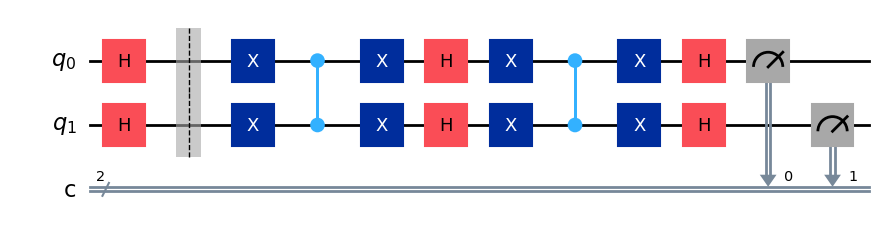

In [ ]:
# Set up the quantum circuit
num_qubits = 2
grover = QuantumCircuit(num_qubits, num_qubits)

# Step 1: Initialization - Apply Hadamard gates to all qubits

# grover.h(0)
# grover.h(1)

# grover.h([0,1])

for i in range(num_qubits):
  grover.h(i)

grover.barrier([0,1])
# Step 2: Build the oracle

# grover.cz(control ,target)
grover.x([0,1])
grover.cz(0,1)

# Step 3: Construct the diffusion operator

grover.x([0,1])
grover.h(0)
grover.h(1)
grover.x(0)
grover.x(1)
grover.cz(0,1)
grover.x(0)
grover.x(1)
grover.h(0)
grover.h(1)

# Step 4: Run the algorithm iteratively
# for ite in range(2):
#   grover.cz(0,1)
#   grover.h(0)
#   grover.h(1)
#   grover.x(0)
#   grover.x(1)
#   grover.cz(0,1)
#   grover.x(0)
#   grover.x(1)
#   grover.h(0)
#   grover.h(1)

# Step 5: Measure the results
grover.measure([0,1],[0,1])

#C is classical. When measure the qubit stores it as classical value for each qubit.

grover.draw('mpl')

In [ ]:
  # execute the quantum circuit
simulator = AerSimulator()
compiled_circuit = transpile(grover, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()
counts = result.get_counts(grover)
print(counts)

{'00': 1000}


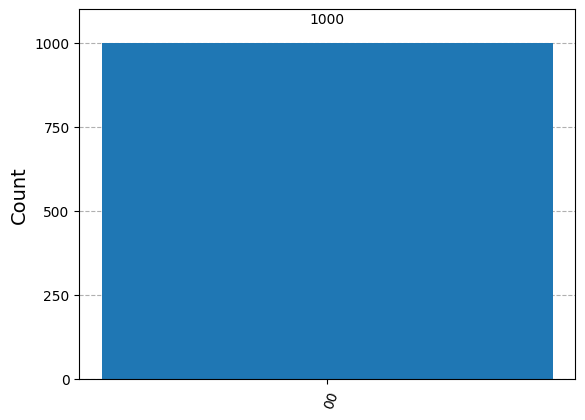

In [ ]:
plot_histogram(counts)

# Challenge Problem
ให้สร้าง Grover's algorithm สำหรับ marked state $|111⟩$

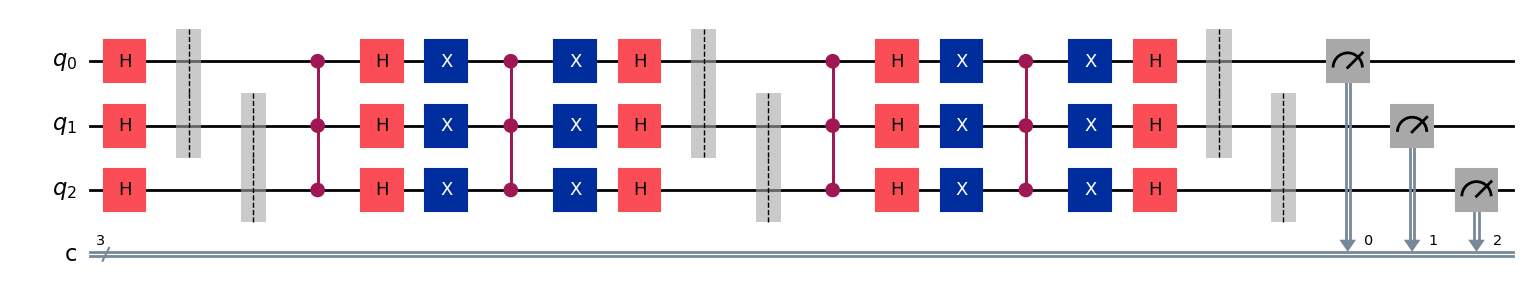

In [ ]:
import math

num_qubits = 3
grover = QuantumCircuit(num_qubits, num_qubits)
marked = 1


for i in range(num_qubits):
  grover.h(i)

grover.barrier([0,1])
grover.barrier([1,2])

optimize = math .floor(math.pi/4 * math.sqrt(math.pow(2,num_qubits)/marked))

for i in range(optimize):
  grover.ccz(0,1,2)

  grover.h([0,1,2])

  grover.x([0,1,2])
  grover.ccz(0,1,2)
  grover.x([0,1,2])
  grover.h([0,1,2])

  grover.barrier([0,1])
  grover.barrier([1,2])

#Measure the results
grover.measure([0,1,2],[0,1,2])

#C is classical. When measure the qubit stores it as classical value for each qubit.

grover.draw('mpl')

In [ ]:
# execute the quantum circuit
simulator = AerSimulator()
compiled_circuit = transpile(grover, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()
counts = result.get_counts(grover)
print(counts)

{'100': 5, '001': 6, '110': 5, '101': 5, '010': 7, '000': 11, '011': 8, '111': 953}


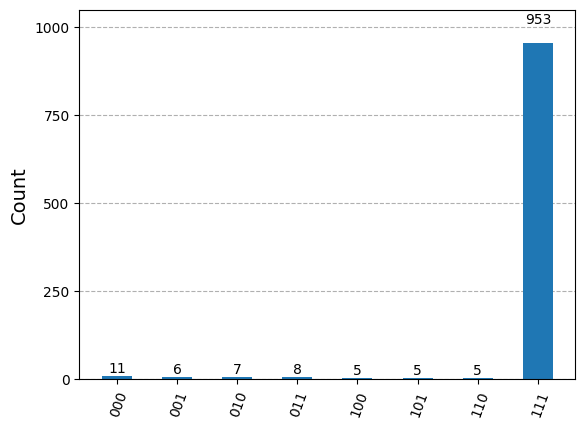

In [ ]:
plot_histogram(counts)

# Special Problem

ให้สร้่าง Grover's algorithm สำหรับ marked state |011⟩ เเละ |100⟩

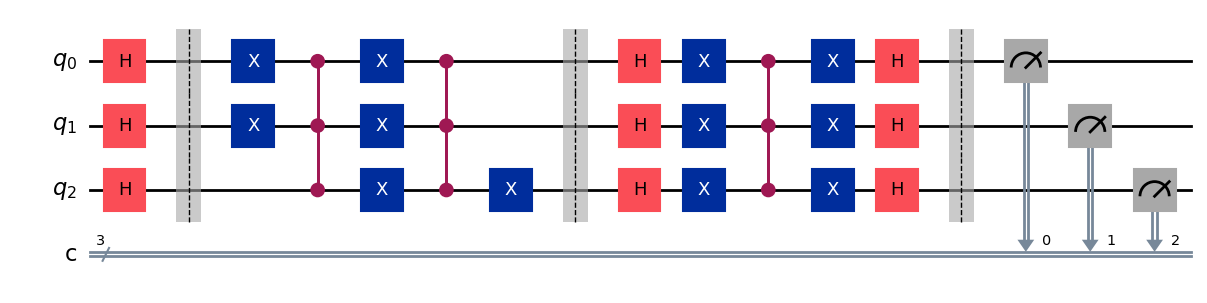

In [ ]:
#011
import math

num_qubits = 3
grover = QuantumCircuit(num_qubits, num_qubits)
marked = 2


for i in range(num_qubits):
  grover.h(i)

grover.barrier([0,1,2])

optimize = math .floor(math.pi/4 * math.sqrt(math.pow(2,num_qubits)/marked))

for i in range(optimize):
  #oracle

  grover.x([0,1])
  grover.ccz(0,1,2)
  grover.x([0,1])

  grover.x(2)
  grover.ccz(0,1,2)
  grover.x(2)

  grover.barrier([0,1,2])

  #oracle

  grover.h([0,1,2])

  grover.x([0,1,2])
  grover.ccz(0,1,2)
  grover.x([0,1,2])
  grover.h([0,1,2])


  grover.barrier([0,1,2])


# for i in range(num_qubits):
#   grover.h(i)

#Measure the results
grover.measure([0,1,2],[0,1,2])

#C is classical. When measure the qubit stores it as classical value for each qubit.

grover.draw('mpl')

In [ ]:
# execute the quantum circuit
simulator = AerSimulator()
compiled_circuit = transpile(grover, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()
counts = result.get_counts(grover)
print(counts)

{'100': 510, '011': 490}


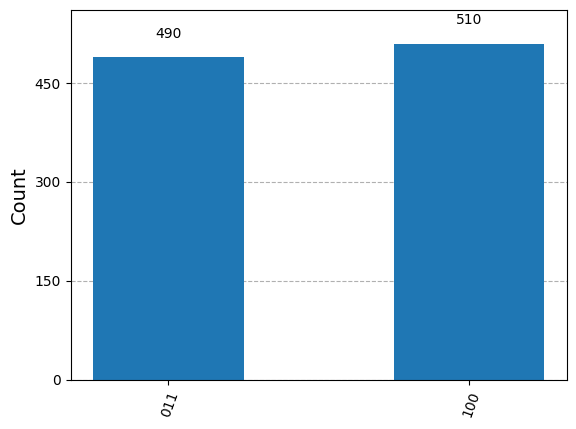

In [ ]:
plot_histogram(counts)